In [32]:
import pandas as pd
from Bio import Entrez, SeqIO

In [33]:
#open biobam eggNOG annotation results 
df = pd.read_csv('/Users/leilaniarvizu/Desktop/genofax_UPDATED/least_annot_amuc/gca_003514565_protein_faa_eggnog.csv')
df

,Type,Query ID,Gene Name,EggNOG Description,E-Value,Bit-Score,Best Tax-Level,EC Codes,#GO,GOs,GO Names,KEGG KO,KEGG Pathway
0,COG,HBW69520.1,NaN,acetyltransferase,2.000000e-185,654.8,Bacteria,NaN,0,NaN,NaN,NaN,NaN
1,COG,HBW69536.1,NaN,adenosylhomocysteinase activity,7.400000e-205,719.5,Bacteria,EC:3.3.1.1,0,NaN,NaN,K01251,"map00270,map01100"
2,COG,HBW69543.1,NaN,"transferase activity, transferring glycosyl gr...",2.200000e-209,734.6,Bacteria,NaN,0,NaN,NaN,K16703,NaN
3,COG,HBW69551.1,NaN,drug transmembrane transporter activity,9.200000e-245,852.4,Bacteria,NaN,0,NaN,NaN,K03327,NaN
4,COG,HBW69558.1,NaN,pathogenesis,1.800000e-103,382.9,Bacteria,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,"KOG,ENOG",HBW69662.1,NaN,Hippocampus abundant transcript-like protein,4.500000e-01,40.0,Poales,NaN,0,NaN,NaN,NaN,NaN
1881,"KOG,ENOG",HBW70898.1,FMNL1,Formin-like,7.800000e-01,41.6,Actinopterygii,NaN,17,F:GO:0051015; C:GO:0045335; P:GO:0051014; P:GO...,F:GTPase activating protein binding; P:actin f...,NaN,NaN
1882,"ENOG,arCOG",HBW69542.1,NaN,N-acetyllactosaminide 3-alpha-galactosyltransf...,3.900000e-17,95.5,Bradyrhizobiaceae,NaN,0,NaN,NaN,NaN,NaN
1883,"ENOG,arCOG",HBW70536.1,NaN,N-acetyllactosaminide 3-alpha-galactosyltransf...,2.100000e-177,628.2,Verrucomicrobiae,NaN,0,NaN,NaN,NaN,NaN


In [34]:
new_df = pd.read_csv('/Users/leilaniarvizu/Desktop/genofax_UPDATED/least_annot_amuc/amuc_least_strain_COG.csv')
new_df

,ID,Value
0,HBW71692.1,M
1,HBW71737.1,L
2,HBW70685.1,NaN
3,HBW70018.1,G
4,HBW69804.1,GM
...,...,...
1880,HBW70566.1,M
1881,HBW70335.1,J
1882,HBW69985.1,NaN
1883,HBW69754.1,NaN


In [35]:
#making a column with COG codes with 0 instead of NA
new_df['COG Code']=new_df['Value'].fillna(0)
new_df


,ID,Value,COG Code
0,HBW71692.1,M,M
1,HBW71737.1,L,L
2,HBW70685.1,NaN,0
3,HBW70018.1,G,G
4,HBW69804.1,GM,GM
...,...,...,...
1880,HBW70566.1,M,M
1881,HBW70335.1,J,J
1882,HBW69985.1,NaN,0
1883,HBW69754.1,NaN,0


In [36]:
# subsetting df to get rid of proteins with no code
strain_COG = new_df[new_df['COG Code'] != 0]
strain_COG = strain_COG.drop(columns = ['Value'])
strain_COG

,ID,COG Code
0,HBW71692.1,M
1,HBW71737.1,L
3,HBW70018.1,G
4,HBW69804.1,GM
5,HBW69696.1,S
...,...,...
1877,HBW71189.1,E
1879,HBW69523.1,P
1880,HBW70566.1,M
1881,HBW70335.1,J


In [37]:
#subsetting df to get strains with no code 
no_COG = new_df[new_df['COG Code'] == 0]
no_COG = no_COG.drop(columns = ['Value','COG Code'])
no_COG

,ID
2,HBW70685.1
17,HBW71496.1
40,HBW71012.1
44,HBW70904.1
47,HBW70321.1
...,...
1866,HBW71363.1
1870,HBW71056.1
1878,HBW69621.1
1882,HBW69985.1


In [38]:
# using Strain-COG df, extracting all its information from original df ### YES COG ####
strains = strain_COG['ID'].tolist() #making a list with strain names 
strain_df = df[df['Query ID'].isin(strains)] #subseting OG df to get information of strains with COG
strain_df

,Type,Query ID,Gene Name,EggNOG Description,E-Value,Bit-Score,Best Tax-Level,EC Codes,#GO,GOs,GO Names,KEGG KO,KEGG Pathway
0,COG,HBW69520.1,NaN,acetyltransferase,2.000000e-185,654.8,Bacteria,NaN,0,NaN,NaN,NaN,NaN
1,COG,HBW69536.1,NaN,adenosylhomocysteinase activity,7.400000e-205,719.5,Bacteria,EC:3.3.1.1,0,NaN,NaN,K01251,"map00270,map01100"
2,COG,HBW69543.1,NaN,"transferase activity, transferring glycosyl gr...",2.200000e-209,734.6,Bacteria,NaN,0,NaN,NaN,K16703,NaN
3,COG,HBW69551.1,NaN,drug transmembrane transporter activity,9.200000e-245,852.4,Bacteria,NaN,0,NaN,NaN,K03327,NaN
4,COG,HBW69558.1,NaN,pathogenesis,1.800000e-103,382.9,Bacteria,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,"COG,ENOG",HBW71737.1,uvrA3,The UvrABC repair system catalyzes the recogni...,0.000000e+00,1655.2,Verrucomicrobiae,NaN,0,NaN,NaN,K03701,map03420
1880,"KOG,ENOG",HBW69662.1,NaN,Hippocampus abundant transcript-like protein,4.500000e-01,40.0,Poales,NaN,0,NaN,NaN,NaN,NaN
1881,"KOG,ENOG",HBW70898.1,FMNL1,Formin-like,7.800000e-01,41.6,Actinopterygii,NaN,17,F:GO:0051015; C:GO:0045335; P:GO:0051014; P:GO...,F:GTPase activating protein binding; P:actin f...,NaN,NaN
1882,"ENOG,arCOG",HBW69542.1,NaN,N-acetyllactosaminide 3-alpha-galactosyltransf...,3.900000e-17,95.5,Bradyrhizobiaceae,NaN,0,NaN,NaN,NaN,NaN


In [39]:
# using noCOG df, extracting all its information from original df ### NO COG!!!!! #####
no_strains = no_COG['ID'].tolist() #making a list with strain names 
no_strain_df = df[df['Query ID'].isin(no_strains)] #subseting OG df to get information of strains with COG
no_strain_df
#note: no eggNOG description == no GOs

,Type,Query ID,Gene Name,EggNOG Description,E-Value,Bit-Score,Best Tax-Level,EC Codes,#GO,GOs,GO Names,KEGG KO,KEGG Pathway
94,COG,HBW70172.1,M1-734,NaN,9.400000e-42,178.3,Bacteria,NaN,0,NaN,NaN,"K07272,K13486,K20543,K21007","map02020,map02025"
193,COG,HBW70997.1,NaN,NaN,4.600000e-01,42.4,Bacteria,NaN,0,NaN,NaN,NaN,NaN
202,COG,HBW71066.1,NaN,NaN,2.200000e-190,671.4,Bacteria,EC:1.2.7.3,0,NaN,NaN,"K00176,K07138","map00020,map00720,map01100,map01120,map01200"
217,COG,HBW71181.1,NaN,NaN,1.900000e-05,55.1,Bacteria,NaN,0,NaN,NaN,NaN,NaN
226,COG,HBW71281.1,NaN,NaN,0.000000e+00,1778.5,Bacteria,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,ENOG,HBW71729.1,NaN,NaN,6.400000e-06,58.5,Verrucomicrobiae,NaN,0,NaN,NaN,NaN,NaN
577,"COG,ENOG",HBW69708.1,ymaB,NaN,6.400000e-116,423.3,Verrucomicrobiae,NaN,0,NaN,NaN,NaN,NaN
981,"COG,ENOG",HBW70370.1,NaN,NaN,5.000000e-248,863.2,Verrucomicrobiae,NaN,0,NaN,NaN,NaN,NaN
1249,"COG,ENOG",HBW70802.1,NaN,NaN,2.800000e-263,914.1,Verrucomicrobiae,NaN,0,NaN,NaN,K07403,NaN


In [40]:
## from each COG df, we're going to seperate each to get genes and no genes 
COLUMNS = 1 
ROWS = 2
strain_gene = strain_df.drop(['Type',
       'EggNOG Description', 'E-Value',
       'Bit-Score', 'Best Tax-Level', 'EC Codes', '#GO', 'GOs', 'GO Names',
       'KEGG KO', 'KEGG Pathway'], axis = 1)


#continuing with getting no gene and gene df 
strain_gene['GENE'] = strain_gene['Gene Name'].fillna(0)

# strain with COG and gene
gene_COG = strain_gene[strain_gene['GENE']!= 0] 
gene_COG = gene_COG.drop(columns=['GENE'])
print(gene_COG)

# strain with COG but no gene
nogene_COG = strain_gene[strain_gene['GENE']== 0]
#print(nogene_COG)
nogene_COG = nogene_COG.drop(columns=['Gene Name', 'GENE'])
print(nogene_COG)

        Query ID Gene Name
7     HBW69579.1      czcB
10    HBW69590.1      rgpB
13    HBW69611.1      feoA
14    HBW69612.1      feoA
21    HBW69669.1      cas2
...          ...       ...
1873  HBW71730.1      lptB
1875  HBW71732.1       mpl
1877  HBW71734.1      uvrD
1879  HBW71737.1     uvrA3
1881  HBW70898.1     FMNL1

[1118 rows x 2 columns]
        Query ID
0     HBW69520.1
1     HBW69536.1
2     HBW69543.1
3     HBW69551.1
4     HBW69558.1
...          ...
1876  HBW71733.1
1878  HBW71735.1
1880  HBW69662.1
1882  HBW69542.1
1883  HBW70536.1

[628 rows x 1 columns]


In [65]:
no_strain_gene = no_strain_df.drop(['Type',
       'EggNOG Description', 'E-Value',
       'Bit-Score', 'Best Tax-Level', 'EC Codes', '#GO', 'GOs', 'GO Names',
       'KEGG KO', 'KEGG Pathway'], axis = 1)

no_strain_gene['GENE'] = no_strain_gene['Gene Name'].fillna(0)

#strain with no COG and gene
gene_noCOG = no_strain_gene[no_strain_gene['GENE']!= 0]
gene_noCOG = gene_noCOG.drop(columns=['GENE'])
print(gene_noCOG)

#strain with no COG and no gene
no_gene_COG = no_strain_gene[no_strain_gene['GENE']== 0]
no_gene_COG = no_gene_COG.drop(columns=['Gene Name','GENE'])
#print(no_gene_COG)


       Query ID Gene Name
94   HBW70172.1    M1-734
313  HBW69861.1   VPA1691
382  HBW70786.1      sdhC
577  HBW69708.1      ymaB


In [42]:
#open each df for each COG Categories Distribution
COG_table = pd.read_csv('../biobam results/COG /COG Code Tables.csv')
COG_table

,Code,Category
0,A,RNA processing and modification
1,B,Chromatin Structure and dynamics
2,C,Energy production and conversion
3,D,Cell cycle control and mitosis
4,E,Amino Acid metabolis and transport
5,F,Nucleotide metabolism and transport
6,G,Carbohydrate metabolism and transport
7,H,Coenzyme metabolis
8,I,Lipid metabolism
9,J,Tranlsation


In [43]:
# now the goal is to use strain + COG + gene df to associate it to COG Catagory 
target_strain = gene_COG['Query ID'].tolist() #all strains with COG
#print(target_strain)
strain_gene_COG = strain_COG[strain_COG['ID'].isin(target_strain)]
strain_gene_COG #subsetted COG and strains with strain with genes; will be used to filter catagories 
cog_tup = list(strain_gene_COG.itertuples(index=False, name = None))
strain_gene_COG

,ID,COG Code
1,HBW71737.1,L
3,HBW70018.1,G
7,HBW69839.1,S
8,HBW70828.1,O
10,HBW70369.1,J
...,...,...
1871,HBW70290.1,GK
1874,HBW70237.1,E
1876,HBW69852.1,H
1879,HBW69523.1,P


In [44]:
# creating a dict with COG code and descripitions
COG_table
COG_dict= COG_table.set_index('Code')['Category'].to_dict()
COG_dict

{'A': 'RNA processing and modification',
 'B': 'Chromatin Structure and dynamics',
 'C': 'Energy production and conversion',
 'D': 'Cell cycle control and mitosis',
 'E': 'Amino Acid metabolis and transport',
 'F': 'Nucleotide metabolism and transport',
 'G': 'Carbohydrate metabolism and transport',
 'H': 'Coenzyme metabolis',
 'I': 'Lipid metabolism',
 'J': 'Tranlsation',
 'K': 'Transcription',
 'L': 'Replication and repair',
 'M': 'Cell wall/membrane/envelop biogenesis',
 'N': 'Cell motility',
 'O': 'Post-translational modification, protein turnover, chaperone functions',
 'P': 'Inorganic ion transport and metabolism',
 'Q': 'Secondary metabolites biosynthesis, transport and catabolism',
 'T': 'Signal Transduction',
 'U': 'Intracellular trafficing and secretion',
 'Y': 'Nuclear structure',
 'Z': 'Cytoskeleton',
 'R': 'General Functional Prediction only',
 'S': 'Function Unknown',
 'V': 'Defense Mechanisms'}

In [45]:
#replacing code with description
strain_CAT_tup =[]
for x,y in cog_tup:
    if y in COG_dict:
        out = (x, COG_dict[y])
        strain_CAT_tup.append(out)
strain_CAT_tup

[('HBW71737.1', 'Replication and repair'),
 ('HBW70018.1', 'Carbohydrate metabolism and transport'),
 ('HBW69839.1', 'Function Unknown'),
 ('HBW70828.1',
  'Post-translational modification, protein turnover, chaperone functions'),
 ('HBW70369.1', 'Tranlsation'),
 ('HBW71519.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW71702.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70236.1', 'Amino Acid metabolis and transport'),
 ('HBW70467.1', 'Amino Acid metabolis and transport'),
 ('HBW71123.1', 'Signal Transduction'),
 ('HBW71158.1', 'Energy production and conversion'),
 ('HBW70565.1', 'Tranlsation'),
 ('HBW70334.1', 'Function Unknown'),
 ('HBW71025.1',
  'Post-translational modification, protein turnover, chaperone functions'),
 ('HBW69902.1', 'Coenzyme metabolis'),
 ('HBW69990.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70806.1', 'Carbohydrate metabolism and transport'),
 ('HBW71474.1', 'Energy production and conversion'),
 ('HBW71724.1', 'Tranlsation'),
 ('HBW69915.1', 

In [46]:
#making lists of targeted category
signal = []
defense = []
secondary = []
other = []
for x,y in strain_CAT_tup:
    if y == 'Signal Transduction':
        signal.append(x)
    elif y == 'Defense Mechanisms':
        defense.append(x)
    elif y == 'Secondary metabolites biosynthesis, transport and catabolism':
        secondary.append(x)
    else: 
        other.append(x)


In [47]:
# now the goal is to use strain + COG + no gene df to associate it to COG Catagory 
target_strain_nogene = nogene_COG['Query ID'].tolist() #all strains with COG and no gene
#print(target_strain)
strain_nogene_COG = strain_COG[strain_COG['ID'].isin(target_strain_nogene)]
strain_nogene_COG #subsetted COG and strains with strain with genes; will be used to filter catagories 
cog_nogene_tup = list(strain_nogene_COG.itertuples(index=False, name = None))
strain_nogene_COG

,ID,COG Code
0,HBW71692.1,M
4,HBW69804.1,GM
5,HBW69696.1,S
6,HBW71341.1,O
9,HBW70116.1,S
...,...,...
1873,HBW70860.1,C
1875,HBW70468.1,S
1877,HBW71189.1,E
1880,HBW70566.1,M


In [48]:
#replacing code with description for no genes
strain_nogene_CAT_tup =[]
for x,y in cog_nogene_tup:
    if y in COG_dict:
        out = (x, COG_dict[y])
        strain_nogene_CAT_tup.append(out)
strain_nogene_CAT_tup

[('HBW71692.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW69696.1', 'Function Unknown'),
 ('HBW71341.1',
  'Post-translational modification, protein turnover, chaperone functions'),
 ('HBW70116.1', 'Function Unknown'),
 ('HBW69598.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70650.1', 'Function Unknown'),
 ('HBW69937.1', 'Function Unknown'),
 ('HBW71221.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70530.1', 'Function Unknown'),
 ('HBW71617.1', 'Function Unknown'),
 ('HBW69541.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70708.1', 'Cell motility'),
 ('HBW70663.1', 'Function Unknown'),
 ('HBW69719.1', 'Function Unknown'),
 ('HBW70454.1', 'Inorganic ion transport and metabolism'),
 ('HBW71110.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW69817.1', 'Cell cycle control and mitosis'),
 ('HBW69608.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW70881.1', 'Amino Acid metabolis and transport'),
 ('HBW70783.1', 'Cell wall/membrane/envelop biogenesis'),
 ('HBW

In [66]:
#making lists of targeted category with no gene strains
signal_nogene = []
defense_nogene = []
secondary_nogene = []
other_nogene = []
for x,y in strain_nogene_CAT_tup:
    if y == 'Signal Transduction':
        signal_nogene.append(x)
    elif y == 'Defense Mechanisms':
        defense_nogene.append(x)
    elif y == 'Secondary metabolites biosynthesis, transport and catabolism':
        secondary_nogene.append(x)
    else: 
        other_nogene.append(x)


### Signal, Defense, and Secondary Metabolism of A. Muc 835 Protein (With Gene) 


In [50]:
singal_gene =gene_COG[gene_COG['Query ID'].isin(signal)]
#singal_gene.to_excel('Signal_Gene_least.xlsx')
len(singal_gene)

11

In [51]:
defense_gene=gene_COG[gene_COG['Query ID'].isin(defense)]
#defense_gene.to_excel('Defense_Gene_least.xlsx')
len(defense_gene)

21

In [52]:
secondary_gene = gene_COG[gene_COG['Query ID'].isin(secondary)]
#secondary_gene.to_excel('Secondary_Gene_least.xlsx')
len(secondary_gene)

8

### Signal, Defense, and Secondary Metabolism of A. Muc 835 Protein (With No Gene) 

In [53]:
singal_nogene = nogene_COG[nogene_COG['Query ID'].isin(signal_nogene)]
#singal_nogene.to_excel('Signal_NoGene_Least.xlsx')
len(singal_nogene)

22

In [54]:
defense_nogene = nogene_COG[nogene_COG['Query ID'].isin(defense_nogene)]
#defense_nogene.to_excel('Defense_NoGene_Least.xlsx')
len(defense_nogene)

15

In [67]:
secondary_nogene = nogene_COG[nogene_COG['Query ID'].isin(secondary_nogene)]
#secondary_nogene.to_excel('Secondary_NoGen_Least.xlsx')
len(secondary_nogene)

4

## Visualizations of COG Distribution

In [56]:
import matplotlib.pyplot as plt

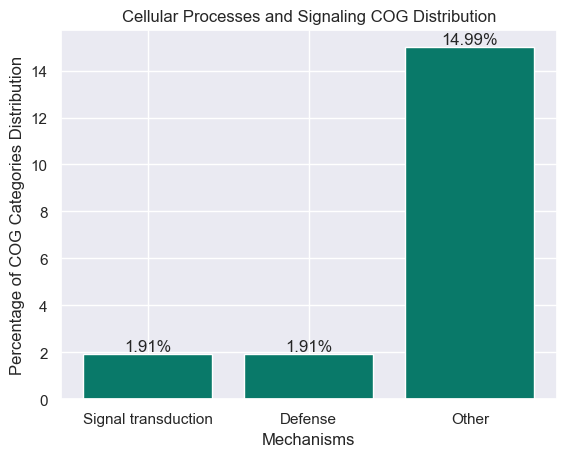

In [57]:
total = 1881 
signal = 36
denfese = 36 
other = 282 

#least annotated
total_least = 1885
signal_least = 33
denfese_least = 36
other_least = 285

signal_percent = signal/total*100
defense_percent = denfese/total *100
other_percent = other/total *100

#least 
signal_least_percent = signal_least/total_least*100
defense_least_percent = denfese_least/total_least *100
other_least_percent = other_least/total_least *100


celluar_names = ['Signal transduction','Defense', 'Other']
ceullar_percent = [signal_percent,defense_percent,other_percent]
ceullar_least_percent = [signal_least_percent,defense_least_percent,other_percent]


plt.bar(celluar_names,ceullar_percent, color = '#097969' )
#plt.bar(celluar_names, ceullar_least_percent)
plt.xlabel('Mechanisms')
plt.ylabel('Percentage of COG Categories Distribution')
plt.title('Cellular Processes and Signaling COG Distribution')
#plt.xticks(rotation =45)
for i, pct in enumerate(ceullar_percent):
    plt.text(i, pct, str(round(pct, 2)) + '%', ha='center', va='bottom')

plt.show()



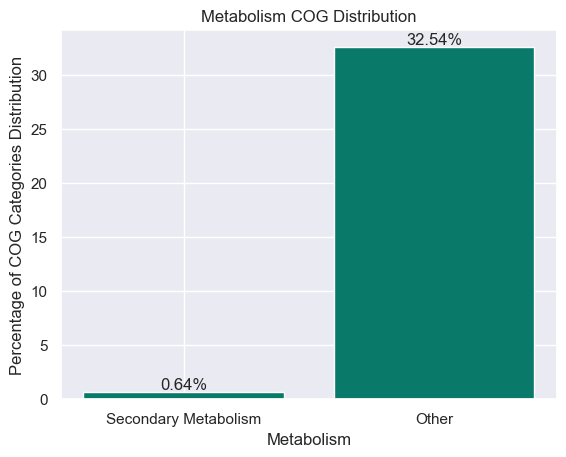

In [58]:
total = 1881 
secondary = 12
other = 612

secondary_percent = secondary/total*100
other_percent = other/total *100

meta_names = ['Secondary Metabolism', 'Other']
meta_percent = [secondary_percent, other_percent]



plt.bar(meta_names,meta_percent, color = '#097969' )

plt.xlabel('Metabolism')
plt.ylabel('Percentage of COG Categories Distribution')
plt.title('Metabolism COG Distribution')
#plt.xticks(rotation =45)

for i, pct in enumerate(meta_percent):
    plt.text(i, pct, str(round(pct, 2)) + '%', ha='center', va='bottom')

plt.show()

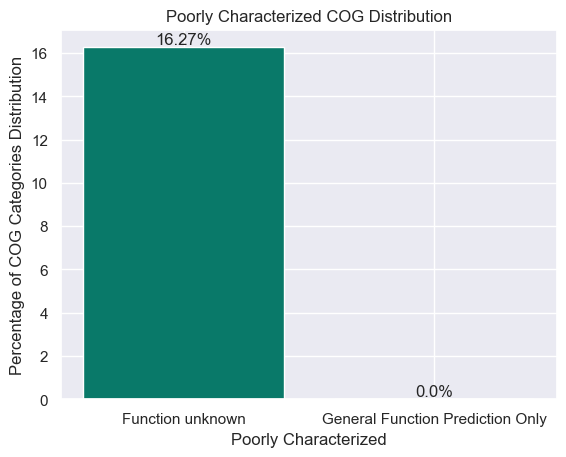

In [59]:
total = 1881 
unknown = 306
pred = 0

unknown_percent = unknown/total*100
pred_percent = pred/total *100

NA_names = ['Function unknown', 'General Function Prediction Only' ]
NA_percent = [unknown_percent, pred_percent]




plt.bar(NA_names,NA_percent, color = '#097969' )

plt.xlabel('Poorly Characterized')
plt.ylabel('Percentage of COG Categories Distribution')
plt.title('Poorly Characterized COG Distribution')
#plt.xticks(rotation =)

for i, pct in enumerate(NA_percent):
    plt.text(i, pct, str(round(pct, 2)) + '%', ha='center', va='bottom')

plt.show()

## Seaborn Data Visuals

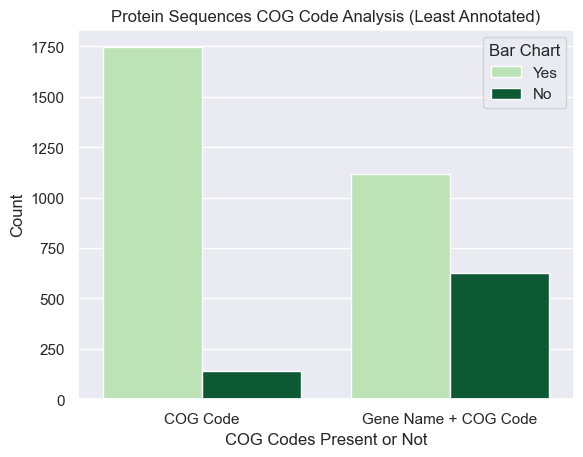

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

protein_nocog = 139
protein_cog = 1746
protein_gene = 1118
protein_nogene= 628
target_COG_gene = 40 
target_COG_nogene = 41
total_COG_nogene = 81


#define bar graphs 
x =['COG Code', 'Gene Name + COG Code']
y1 = [protein_cog, protein_gene]
y2 = [protein_nocog, protein_nogene]



# Create a DataFrame to hold the data
data = {'Category': x, 'Yes': y1, 'No': y2}
df = pd.DataFrame(data)

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df, id_vars='Category', var_name='Bar Chart', value_name='Value')

# Define custom light and dark green colors
light_green = "#B7E9AF"  # replace with your desired light green color
dark_green = "#006633"   # replace with your desired dark green color

# Create a color palette with the custom colors
my_colors = [light_green, dark_green]


# Create the bar chart using Seaborn
sns.set_theme(style="darkgrid")
sns.barplot(x='Category', y='Value', hue='Bar Chart', data=df_melted, palette=my_colors)

# Add labels and title
plt.xlabel('COG Codes Present or Not')
plt.ylabel('Count')
plt.title('Protein Sequences COG Code Analysis (Least Annotated)')


# Show the plot
plt.show()



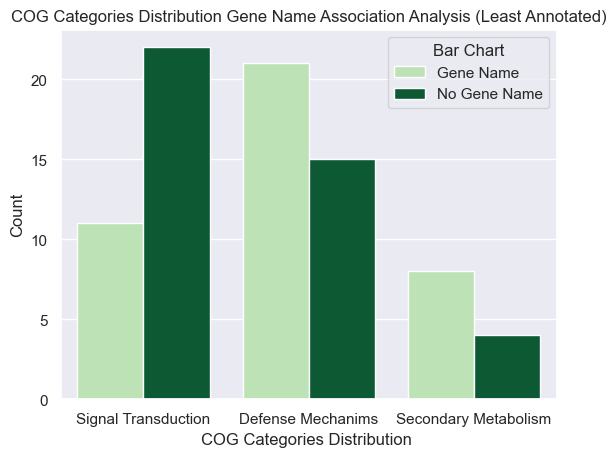

In [63]:
#for cog categories 
gene_signal = len(singal_gene)
gene_defense = len(defense_gene)
gene_secondary = len(secondary_gene)
nogene_signal = len(signal_nogene)
nogene_defense = len(defense_nogene)
nogene_secondary = len(secondary_nogene)

#define bar graphs 
x =['Signal Transduction', 'Defense Mechanims', 'Secondary Metabolism']
y1 = [gene_signal, gene_defense, gene_secondary]
y2 = [nogene_signal, nogene_defense, nogene_secondary]




# Create a DataFrame to hold the data
data = {'Category': x, 'Gene Name': y1, 'No Gene Name': y2}
df = pd.DataFrame(data)

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df, id_vars='Category', var_name='Bar Chart', value_name='Value')

# Define custom light and dark green colors
light_green = "#B7E9AF"  # replace with your desired light green color
dark_green = "#006633"   # replace with your desired dark green color

# Create a color palette with the custom colors
my_colors = [light_green, dark_green]


# Create the bar chart using Seaborn
sns.set_theme(style="darkgrid")
sns.barplot(x='Category', y='Value', hue='Bar Chart', data=df_melted, palette=my_colors)

# Add labels and title
plt.xlabel('COG Categories Distribution ')
plt.ylabel('Count')
plt.title('COG Categories Distribution Gene Name Association Analysis (Least Annotated)')

# Show the plot
plt.show()


## Signal Transduction Analysis

In [ ]:
#signal proteins with no gene name
dfs = pd.read_csv('../signal and defense analysis/signal-Alignment-HitTable_most.csv')
dfs

In [ ]:
#selecting the proteins with 100% match 
#selected_rows = dfs.iloc[::101]
selected_rows = dfs[dfs['Query Cover'] == 100]
selected_rows

In [ ]:
#just getting the protein sequences of 100 match
protein_dfs = selected_rows[["ID","Protein"]]
protein_dfs

In [ ]:
#dropped duplicates and got top match for each protein 
protein_dfs.drop_duplicates(subset='ID', inplace=True)
#protein_dfs.to_excel('Signal_NoGene_Most_Protein.xlsx')
protein_dfs

In [ ]:
dfl = pd.read_csv('../signal and defense analysis/signal-Alignment-HitTable_least.csv')
dfl

In [ ]:
selected_rows_l = dfl[dfl['Query Cover'] == 100]
selected_rows_l

In [ ]:
protein_dfl = selected_rows_l[["ID","Protein"]]
protein_dfl

In [ ]:
protein_dfl.drop_duplicates(subset='ID', inplace=True)
#protein_dfl.to_excel('Signal_NoGene_Least_Protein.xlsx')
protein_dfl

## Defense Analysis


In [ ]:
dfd = pd.read_csv('../signal and defense analysis/defense-Alignment-HitTable_most.csv')
dfd

In [ ]:
selected_rowsdm = dfd[dfd['Query Cover'] == 100]
selected_rowsdm

In [ ]:
protein_dfdm = selected_rowsdm[["ID","Protein"]]
protein_dfdm

In [ ]:
protein_dfdm.drop_duplicates(subset='ID', inplace=True)
#protein_dfdm.to_excel('Defense_NoGene_Most_Protein.xlsx')
protein_dfdm

In [ ]:
dfld = pd.read_csv('../signal and defense analysis/defense-Alignment-HitTable_least.csv')
dfld

In [ ]:
selected_rows_ld = dfld[dfld['Query Cover'] == 100]
selected_rows_ld

In [ ]:
protein_dfld = selected_rows_ld[["ID","Protein"]]
protein_dfld

In [ ]:
protein_dfld.drop_duplicates(subset='ID', inplace=True)
#protein_dfld.to_excel('Defense_NoGene_Least_Protein.xlsx')
protein_dfld

## Fetching FASTA Protein Sequences

In [ ]:
protein_ids = protein_dfld['Protein'].tolist()
protein_sequences=[]

Entrez.email = 'leilaniarvizu4@gmail.com'
for protein_id in protein_ids:
    handle = Entrez.efetch(db='protein', id=protein_id, rettype='fasta')
    record = SeqIO.read(handle, 'fasta')
    handle.close()
    protein_sequences.append(str(record.seq))

protein_sequences
protein_dfld['Protein Sequences'] = protein_sequences
protein_dfld.to_excel('Defense_NoGene_Least_Protein.xlsx')
protein_dfld

## Protein Domain Analysis

In [ ]:
ip_s_least = pd.read_csv('../signal and defense analysis/signal_least_interpro_results.csv')
ip_s_least = ip_s_least[['ID','db','protein domain id','descripition']]
ip_s_least

In [ ]:
s_least_pfam = ip_s_least[ip_s_least['db'] == 'Pfam']
s_least_pfam.to_excel('signal_least_pfam.xlsx')